## Project Days Data Analysis
In this notebook, I have scaled the data from grasp logs using MinMaxScaler to convert the grasp log's attributes in the range of 0 and 1.

In [1]:
# Import required package

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read the dataset file
data = pd.read_csv('Data_16nov.csv')

# Deleting the first columns of sequence number
data.drop(data.columns[0],axis=1,inplace=True)

# Printing basic info of dataset
print 'Number of records:',data.shape[0]
print 'Number of attributes:',data.shape[1]


# Printing Column names
print([a for a in data.columns])

Number of records: 77
Number of attributes: 12
['timestamp', 'group', 'disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']


In [3]:
# Printing sample of the dataset

data.head()

,timestamp,group,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
0,2017-10-18 10:15:16,1AB,0.0,0.0,1.0,1.0,0.0,0.0,2,0,0,0
1,2017-10-18 10:20:11,1AB,0.0,0.0,1.0,1.0,0.0,0.0,6,8,11,0
2,2017-10-18 10:25:04,1AB,0.0,0.0,1.0,0.5,1.0,1.0,0,0,0,0
3,2017-10-18 10:30:19,1AB,0.0,0.5,1.0,0.5,1.0,0.5,3,2,0,0
4,2017-10-18 10:35:21,1AB,0.0,0.5,1.0,1.0,0.0,0.0,0,0,0,0


In [4]:
# Checking the unique values in every attribute except timestamp

for column in data.columns:
    if column != 'timestamp':
        print('unique values in' ,column,pd.unique(data[column]))

('unique values in', 'group', array(['1AB', '1CD', '1GF', '1HI', '2ABC', '2DE', '2FGH', '2IJ', '3AB',
       '3CD'], dtype=object))
('unique values in', 'disengaged', array([0. , 0.5, 1. ]))
('unique values in', 'looking', array([0.   , 0.5  , 1.   , 0.667, 0.333]))
('unique values in', 'talking', array([1.   , 0.   , 0.5  , 0.333, 0.667]))
('unique values in', 'intTech', array([1.   , 0.5  , 0.   , 0.667, 0.333]))
('unique values in', 'intRes', array([0.   , 1.   , 0.5  , 0.333, 0.667]))
('unique values in', 'intExt', array([0.   , 1.   , 0.5  , 0.667, 0.333]))
('unique values in', 'Accessed', array([ 2,  6,  0,  3, 12,  1,  5, 14, 18,  7, 10, 13,  4,  9, 11, 23, 19]))
('unique values in', 'Create', array([ 0,  8,  2,  6,  1,  7, 12,  4,  5, 13]))
('unique values in', 'Open', array([ 0, 11, 12,  1,  2,  7,  4, 29, 47, 17, 13, 39,  8,  6, 22, 15, 26]))
('unique values in', 'Update', array([ 0, 18,  3,  6,  2,  7, 34, 21, 10,  8, 25, 14, 13, 17, 50,  1,  9,
       12,  5, 16, 11]))


# Scaling grasp log data
In this section, i will explore various scaling techniques (Standard scaling and MinMax scaling) on grasp log data.

In [5]:
from sklearn import preprocessing

In [6]:
# separating observation data from grasp log data

# fetching observation data
obvdata = data.iloc[:,2:8]


# fetching grasp log data
graspdata = data.iloc[:,8:12]

In [7]:
# Applying Standard scaling
s_graspdata = preprocessing.StandardScaler().fit_transform(graspdata)


# Applying MinMax scaling
m_graspdata = preprocessing.MinMaxScaler().fit_transform(graspdata)


In [9]:
# Creating pandas dataframe from output of scaling (numpy scaled array)
scaled_data = pd.DataFrame({'Accessed':m_graspdata[:,0],'Create':m_graspdata[:,1],'Open':m_graspdata[:,2],'Update':m_graspdata[:,3]})

In [30]:
# Concatenating scaled grasp data with observation data
s_data = pd.concat([obvdata,scaled_data],axis=1)

# printing sample of scaled data
s_data.head()

,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
0,0.0,0.0,1.0,1.0,0.0,0.0,0.086957,0.000000,0.000000,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.260870,0.615385,0.234043,0.0
2,0.0,0.0,1.0,0.5,1.0,1.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.5,1.0,0.5,1.0,0.5,0.130435,0.153846,0.000000,0.0
4,0.0,0.5,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [31]:


from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.decomposition import FactorAnalysis


# Applying PCA, Isomap and FactorAnalysis to 2d data
pca = decomposition.PCA(n_components = 2)
isomap = Isomap(n_components =2)
fa = FactorAnalysis(n_components = 2, random_state = 0)

pca_data2d = pca.fit_transform(s_data)
iso_data2d = isomap.fit_transform(s_data)
fa_data2d = fa.fit_transform(s_data)



# Applying PCA, Isomap and FactorAnalysis to 1d data
pca1 = decomposition.PCA(n_components = 1)
isomap1 = Isomap(n_components =1)
fa1 = FactorAnalysis(n_components = 1, random_state = 0)

pca_data1d = pca1.fit_transform(s_data)
iso_data1d = isomap1.fit_transform(s_data)
fa_data1d = fa1.fit_transform(s_data)



In [13]:
def plot_it(labels,data,group,title,dim=2):
    """
    plot_id : function to plot data with different representation
        labels : labels for each point
        data   : 2d data to plot
        group  : name of the group for which plot has to be generated, possible values (group-name or "all")
        random : Whether to print labels for all nodes or randomly
        title  : title of the graph
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)


    
    for i in range(len(data)):
        if dim==2:
            if group == "all":
                ax.scatter(data[i,0],data[i,1],c='b')
                ax.annotate((labels[i],i),xy=(data[i,0],data[i,1]),xytext=(data[i,0],data[i,1]))
            else:
                if labels[i]==group:
                    ax.scatter(data[i,0],data[i,1],c='b')
                    ax.annotate((labels[i],i),xy=(data[i,0],data[i,1]),xytext=(data[i,0],data[i,1]))
    
        else:
            if group == "all":
                ax.scatter(data[i],0,c='b')
                print(labels[i],i),':',data[i]
                ax.annotate((labels[i],i),xy=(data[i],0),xytext=(data[i],0))
            else:
                if labels[i]==group:
                    ax.scatter(data[i],0,c='b')
                    print(labels[i],i),':',data[i]
                    ax.annotate((labels[i],i),xy=(data[i],0),xytext=(data[i],0))
    plt.title(title)
    plt.axhline(0)
    plt.axvline(0)
    plt.show()

<IPython.core.display.Javascript object>


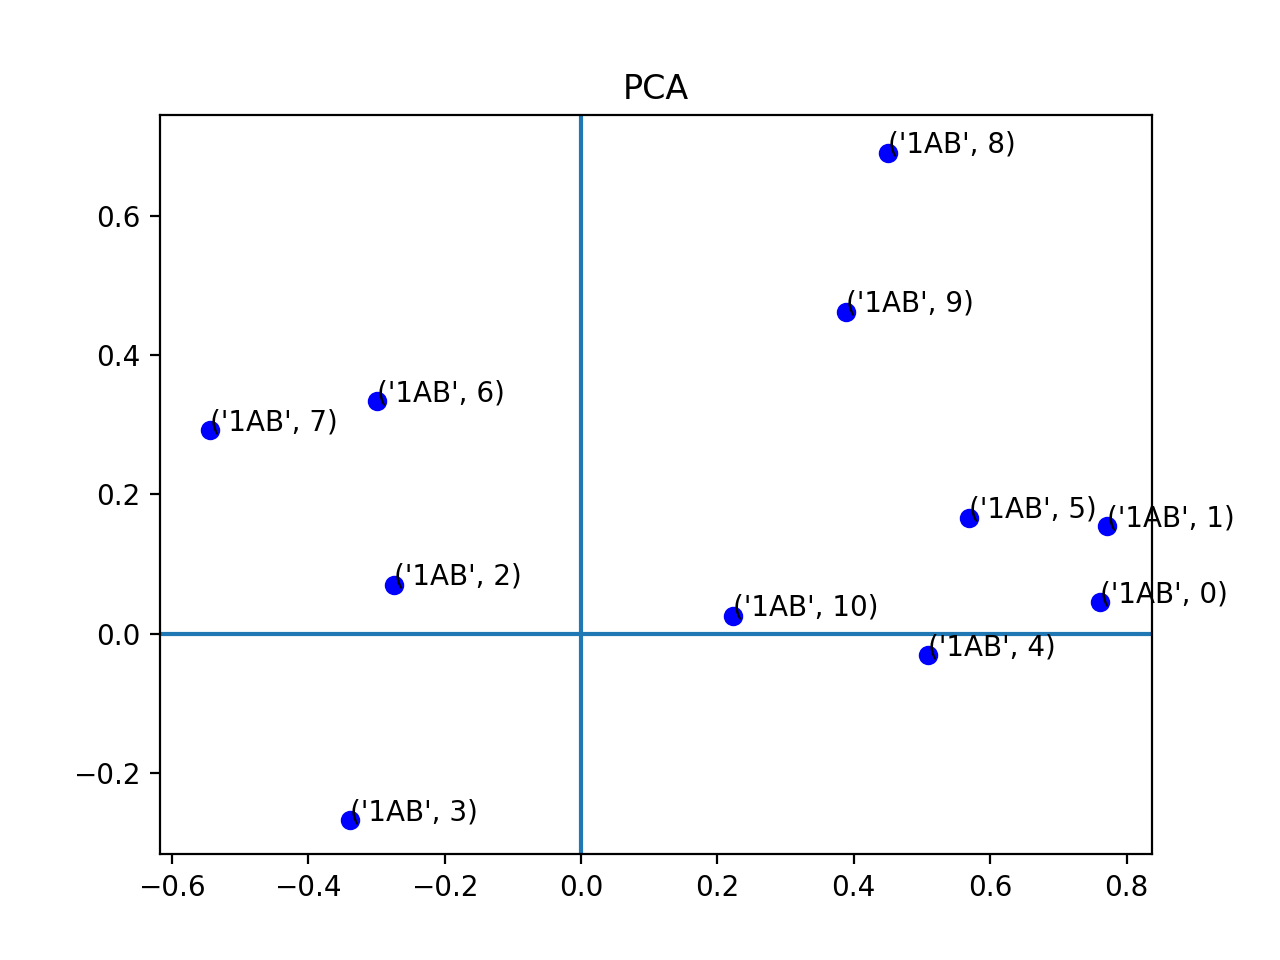

In [15]:
%matplotlib notebook
# Plotting pca results for each group
# '1AB', '1CD', '1GF', '1HI', '2ABC', '2DE', '2FGH', '2IJ', '3AB','3CD'
plot_it(data.iloc[:,1],pca_data2d,group="1AB",title="PCA")

<IPython.core.display.Javascript object>


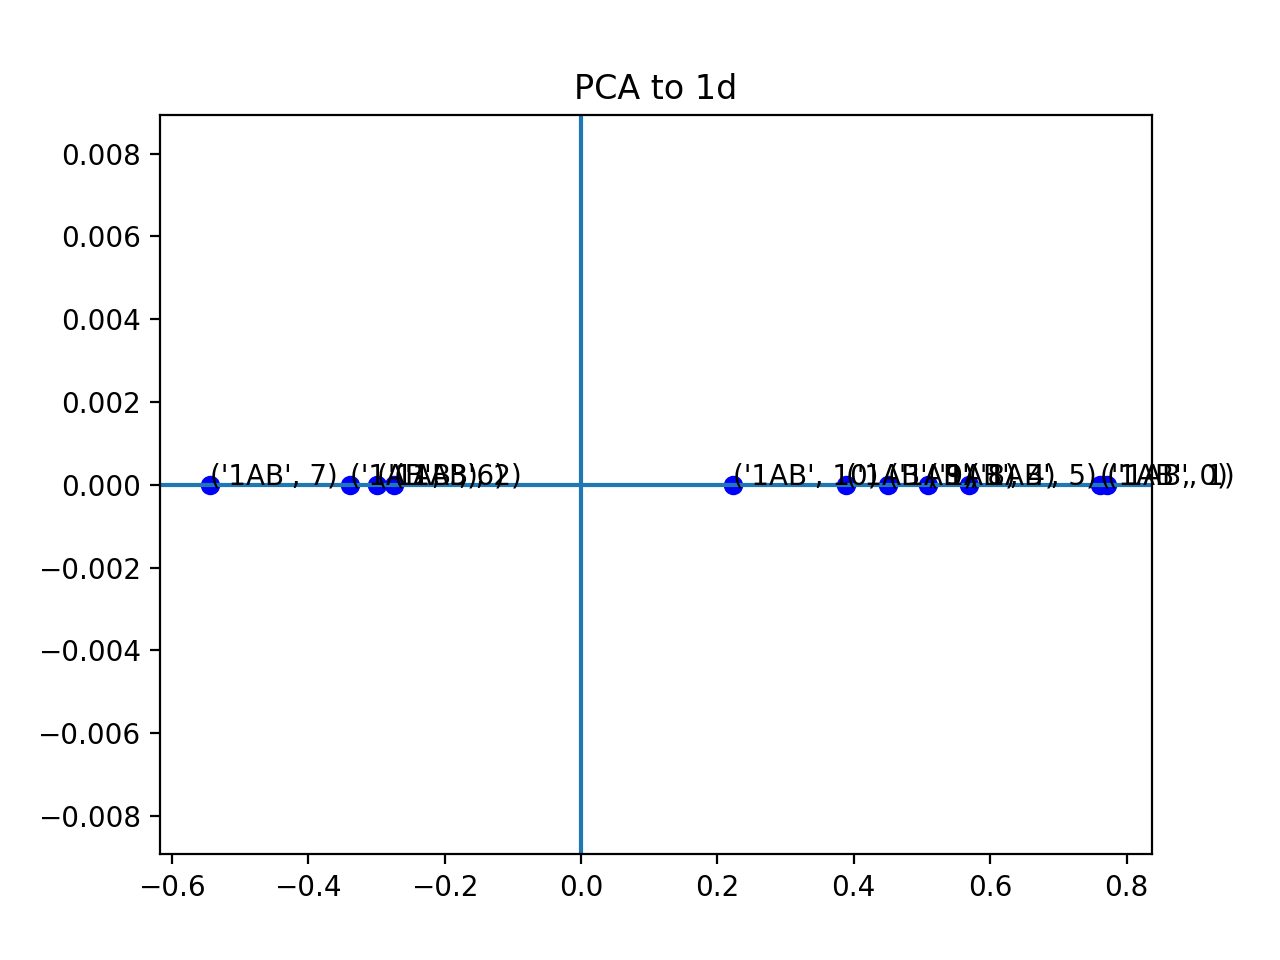

('1AB', 0) : [0.76179588]
('1AB', 1) : [0.77115322]
('1AB', 2) : [-0.27342783]
('1AB', 3) : [-0.33874057]
('1AB', 4) : [0.50839814]
('1AB', 5) : [0.56862212]
('1AB', 6) : [-0.29966454]
('1AB', 7) : [-0.54369328]
('1AB', 8) : [0.45059117]
('1AB', 9) : [0.38874618]
('1AB', 10) : [0.22228351]


In [16]:
plot_it(data.iloc[:,1],pca_data1d,group="1AB",title="PCA to 1d",dim=1)

<IPython.core.display.Javascript object>


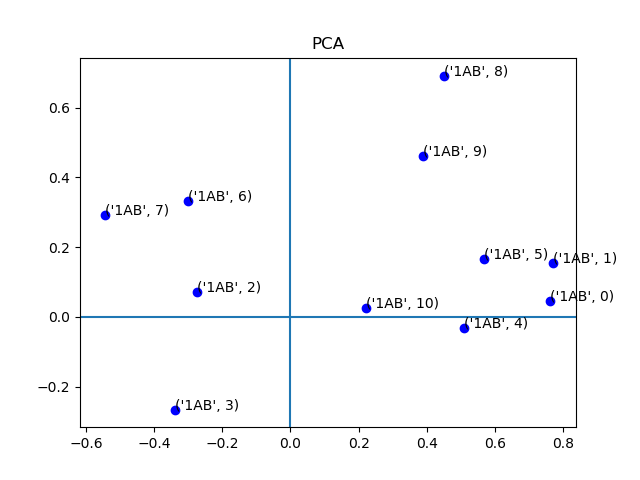

In [50]:
# Change the group name for plotting for different group
plot_it(data.iloc[:,1],pca_data2d,group="1AB",title="PCA")

<IPython.core.display.Javascript object>


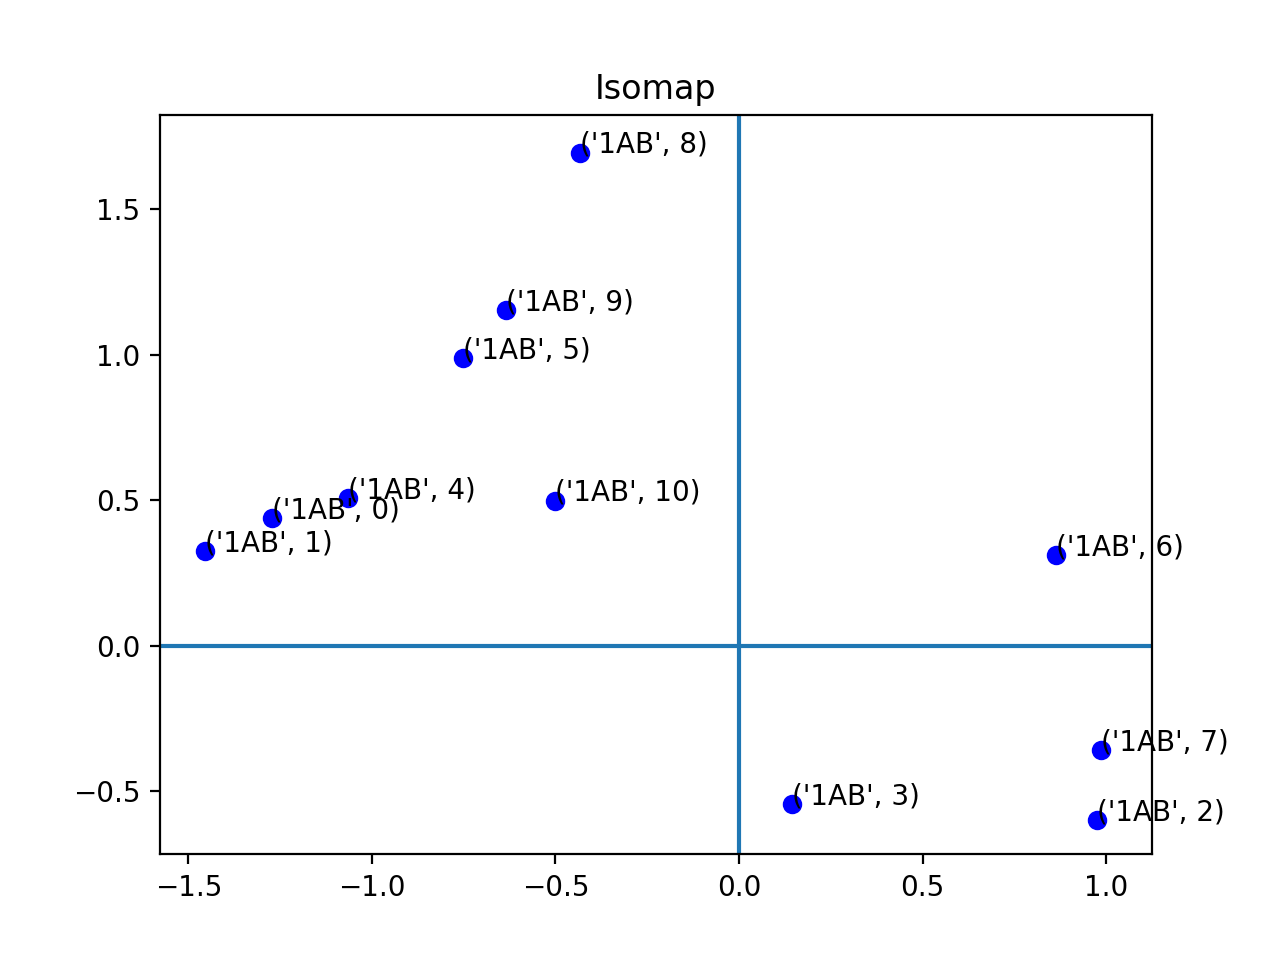

In [17]:

# Plotting Isomap results
plot_it(data.iloc[:,1],iso_data2d,group="1AB",title="Isomap")

## Isomap reduction method & Observation

I am observing each group one by one.
So far, on the basis of my observation, I can say that x-axis can be termed as active participation in terms of physical aspect.
So action participation axis is composed of primarily ( talking, intTech, intExt, intRes) and also composed of looking and disengaged.


#### One interesting observation for group 1AB
When i look at the IsoMap results for one dimension, I found one interesting thing. If we consider the active participation (as talking, intTech, intRes, intExt) then for group 1AB results are quite reasonable.

For instance, the highest value (.9861) is for the entry when group is involved in all these four sub-activities.
Minimum value (negative) are for those entries where group were not involved in one or more than one sub-activities.

Well it can't be said that only four physical activities are forming the x-axis. However, i think that these activities are primarily involved in forming one axis.

<IPython.core.display.Javascript object>


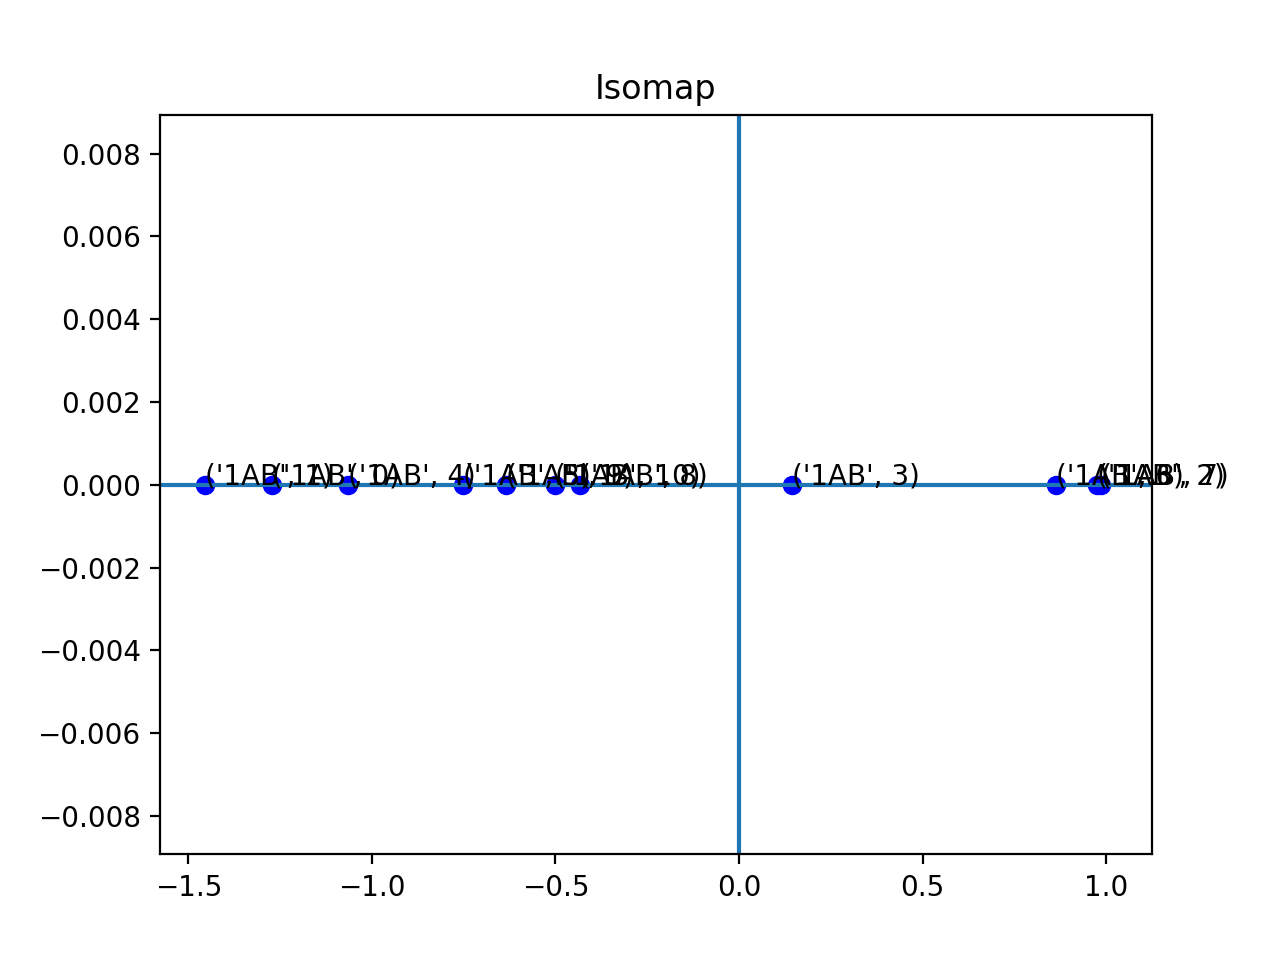

('1AB', 0) : [-1.27240595]
('1AB', 1) : [-1.45436376]
('1AB', 2) : [0.97517263]
('1AB', 3) : [0.14572196]
('1AB', 4) : [-1.06544768]
('1AB', 5) : [-0.75233799]
('1AB', 6) : [0.86287957]
('1AB', 7) : [0.98617074]
('1AB', 8) : [-0.43328325]
('1AB', 9) : [-0.63403805]
('1AB', 10) : [-0.50223559]


In [18]:
# plotting 1d data from Isomap
plot_it(data.iloc[:,1],iso_data1d,group="1AB",title="Isomap",dim=1)

## Observation for 1CD group
Lowest value for group 1CD (-2) is because of group at that moment not participating in any of the active participation activities. Additionally, was also disengaged.

<IPython.core.display.Javascript object>


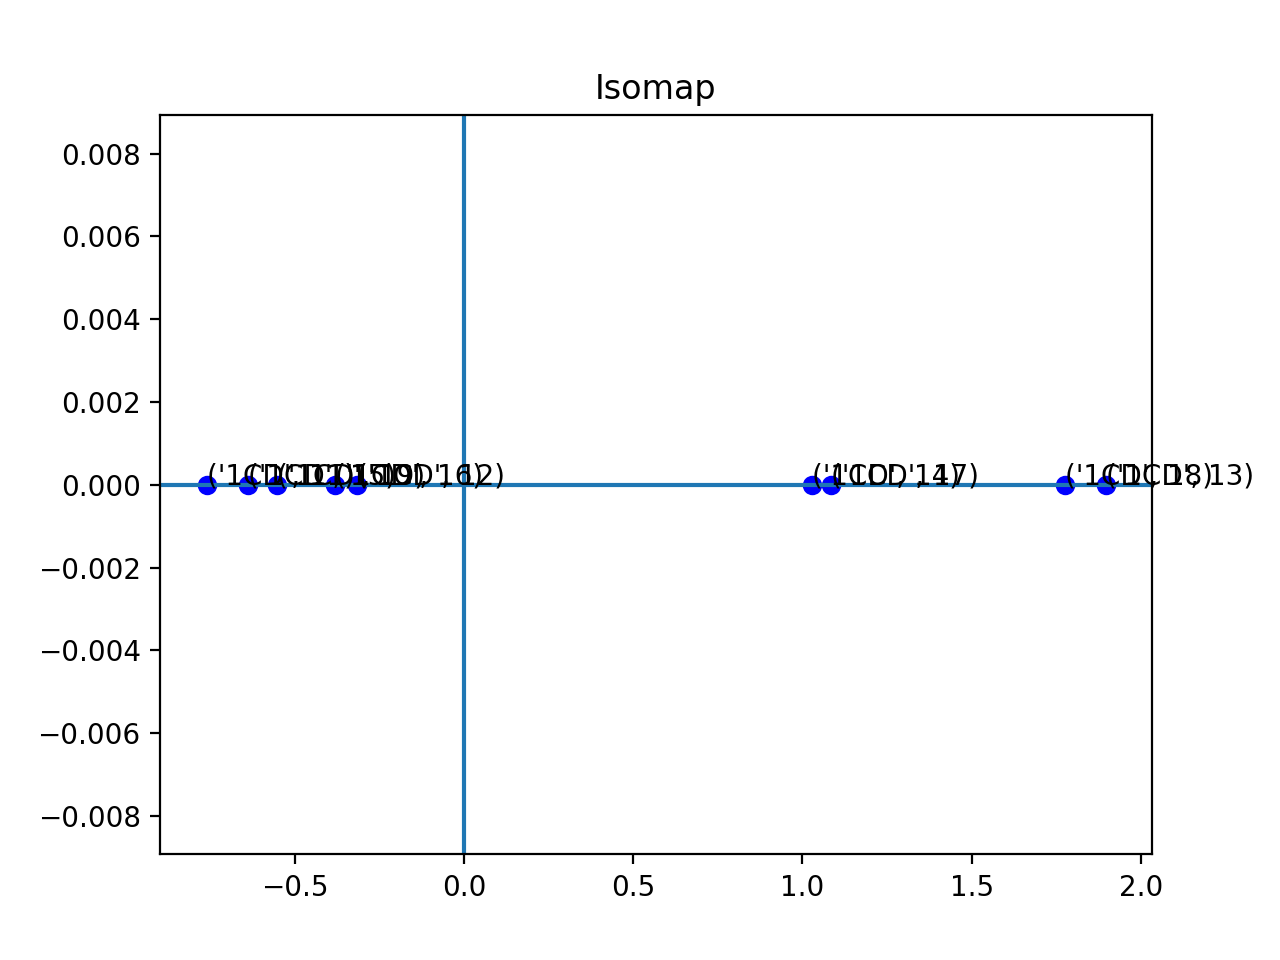

('1CD', 11) : -0.7587907016587292
('1CD', 12) : -0.3166648495928917
('1CD', 13) : 1.8966331037994968
('1CD', 14) : 1.0268733835473631
('1CD', 15) : -0.6381375166149074
('1CD', 16) : -0.38055798965754833
('1CD', 17) : 1.0846471193642715
('1CD', 18) : 1.7766533757764127
('1CD', 19) : -0.5522264946563686


In [19]:
# plotting y axis for 1CD group
plot_it(data.iloc[:,1],iso_data2d[:,1],group='1CD',title='Isomap',dim=1)

<IPython.core.display.Javascript object>


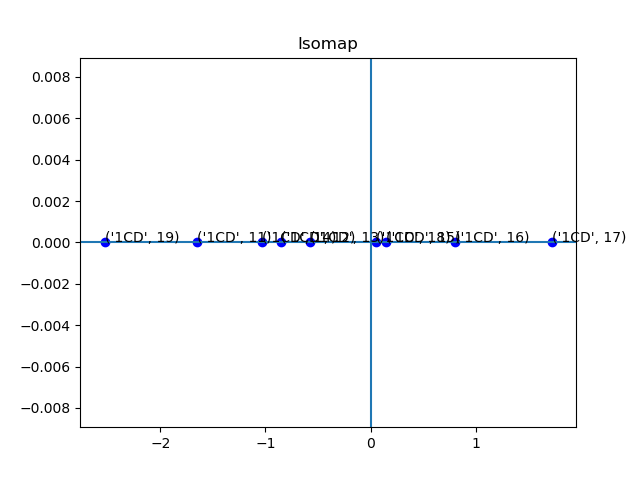

('1CD', 11) : [-1.65428469]
('1CD', 12) : [-0.85015717]
('1CD', 13) : [-0.57543532]
('1CD', 14) : [-1.03297276]
('1CD', 15) : [0.14881447]
('1CD', 16) : [0.79983929]
('1CD', 17) : [1.72382449]
('1CD', 18) : [0.05427635]
('1CD', 19) : [-2.5266398]


In [75]:
# plotting 1d data from Isomap
plot_it(data.iloc[:,1],iso_data1d,group="1CD",title="Isomap",dim=1)

<IPython.core.display.Javascript object>


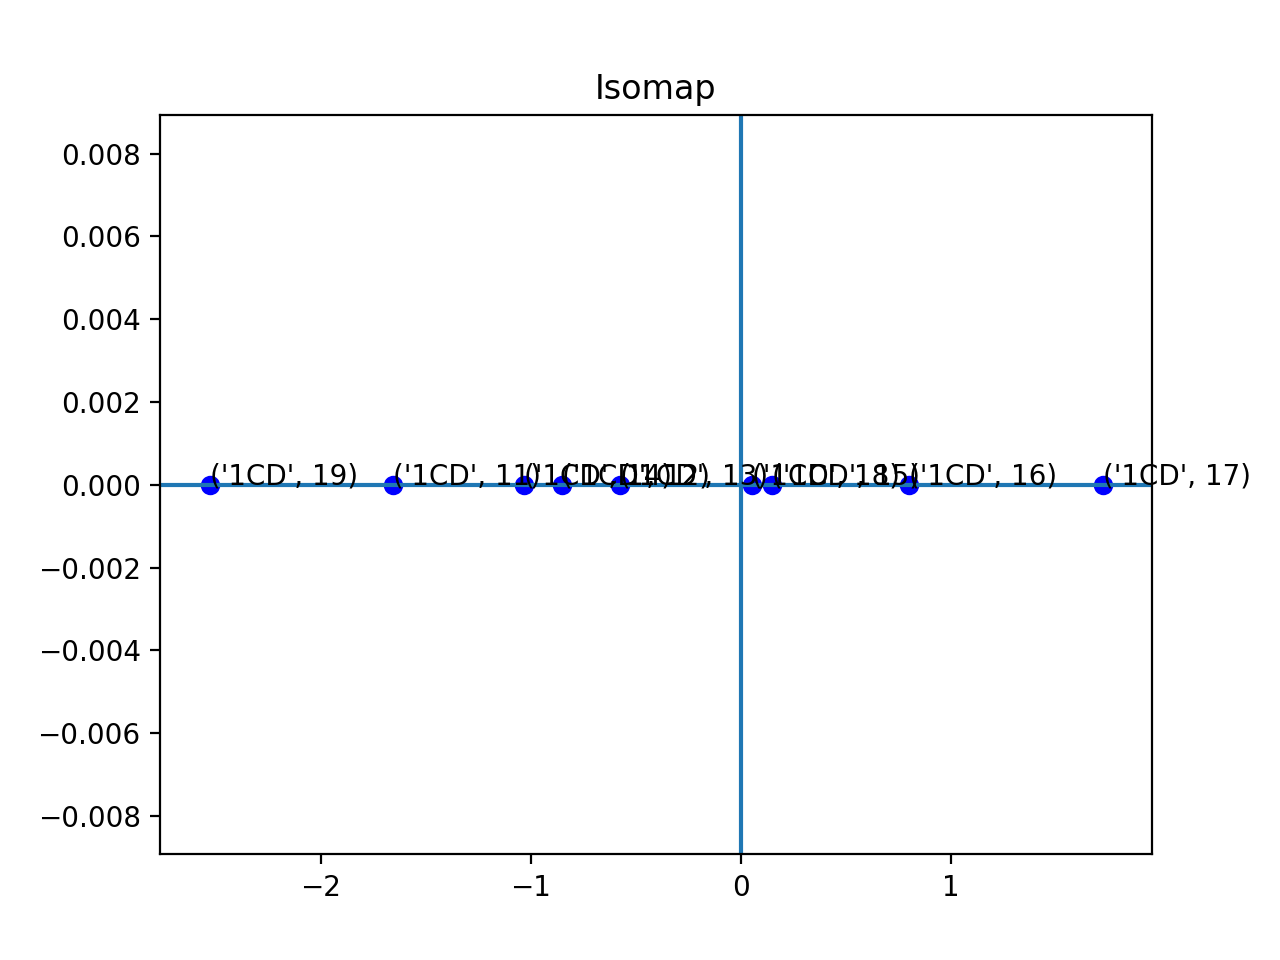

('1CD', 11) : [-1.65428469]
('1CD', 12) : [-0.85015717]
('1CD', 13) : [-0.57543532]
('1CD', 14) : [-1.03297276]
('1CD', 15) : [0.14881447]
('1CD', 16) : [0.79983929]
('1CD', 17) : [1.72382449]
('1CD', 18) : [0.05427635]
('1CD', 19) : [-2.5266398]


In [20]:
# plotting 1d data from Isomap
plot_it(data.iloc[:,1],iso_data1d,group="1CD",title="Isomap",dim=1)

<IPython.core.display.Javascript object>


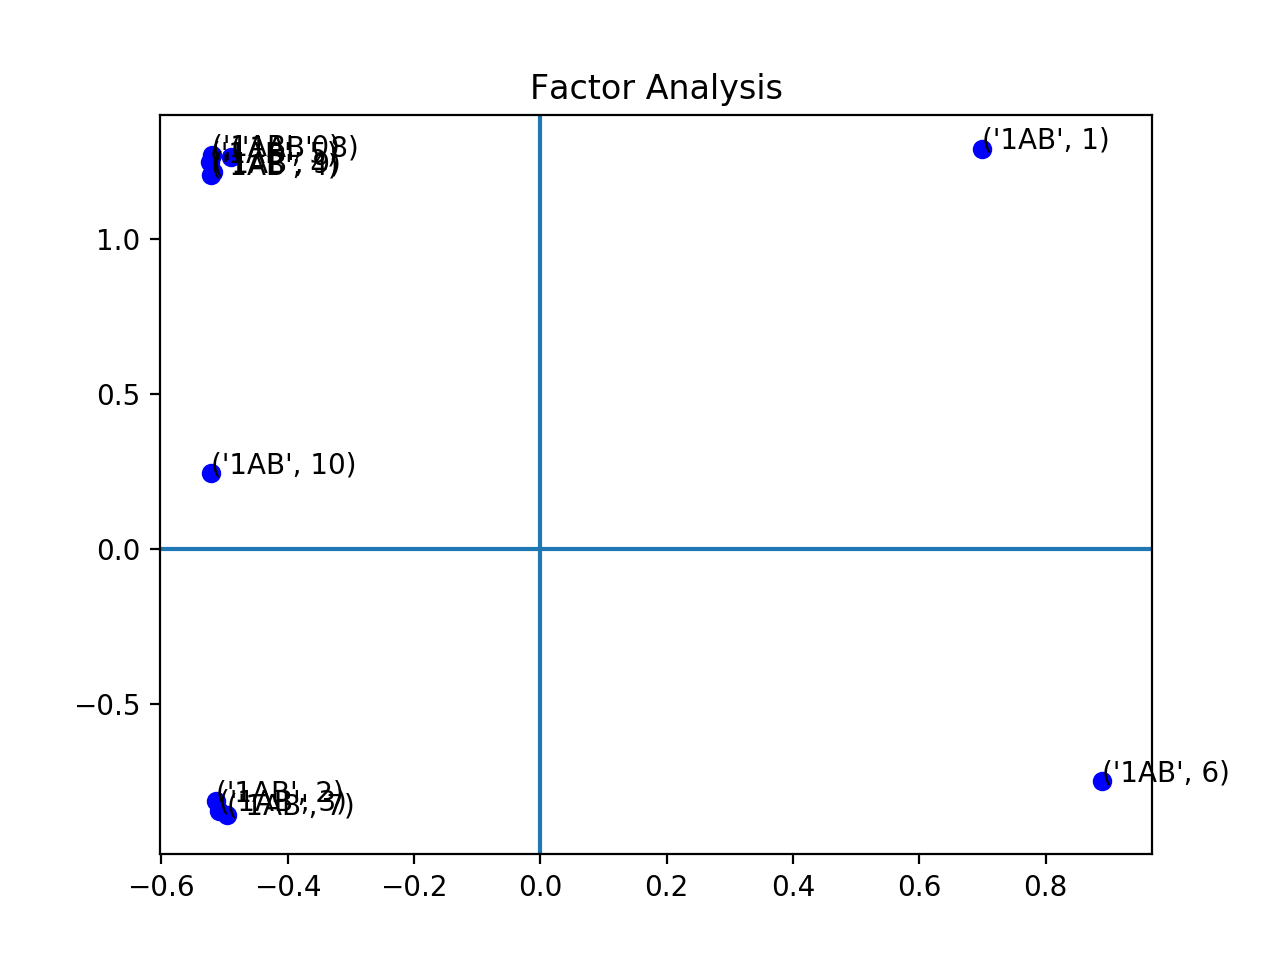

In [21]:

# Plotting Factor analysis results
plot_it(data.iloc[:,1],fa_data2d,group="1AB",title="Factor Analysis")

In [22]:
# Group by representation and interpretation
iso_data2d_copy = iso_data2d
#print(iso_data2d)
iso_data2d_copy[:,1] = -1 * iso_data2d_copy[:,1]
#print(iso_data2d_copy)

<IPython.core.display.Javascript object>


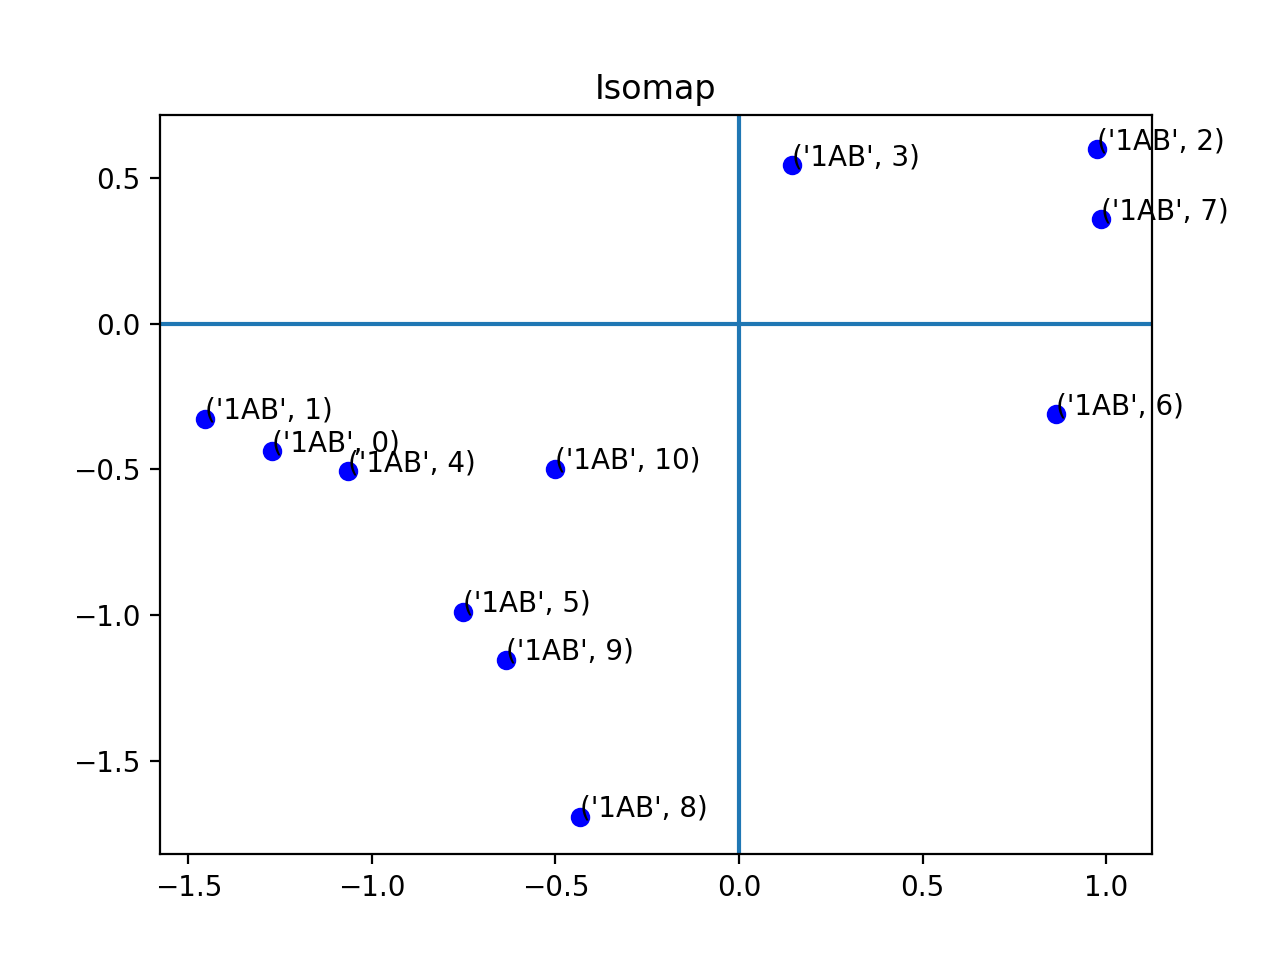

In [23]:

plot_it(data.iloc[:,1],iso_data2d,group="1AB",title="Isomap")

## Isomap on non-scaled data

In [24]:

# read the dataset file
data1 = data.iloc[:,2:12]
data1.head()

,disengaged,looking,talking,intTech,intRes,intExt,Accessed,Create,Open,Update
0,0.0,0.0,1.0,1.0,0.0,0.0,2,0,0,0
1,0.0,0.0,1.0,1.0,0.0,0.0,6,8,11,0
2,0.0,0.0,1.0,0.5,1.0,1.0,0,0,0,0
3,0.0,0.5,1.0,0.5,1.0,0.5,3,2,0,0
4,0.0,0.5,1.0,1.0,0.0,0.0,0,0,0,0


In [25]:
pca = decomposition.PCA(n_components = 2)
isomap = Isomap(n_components =2)
fa = FactorAnalysis(n_components = 2, random_state = 0)

pca_data2d = pca.fit_transform(data1)
iso_data2d = isomap.fit_transform(data1)
fa_data2d = fa.fit_transform(data1)



# Applying PCA, Isomap and FactorAnalysis to 1d data
pca1 = decomposition.PCA(n_components = 1)
isomap1 = Isomap(n_components =1)
fa1 = FactorAnalysis(n_components = 1, random_state = 0)

pca_data1d = pca1.fit_transform(data1)
iso_data1d = isomap1.fit_transform(data1)
fa_data1d = fa1.fit_transform(data1)

<IPython.core.display.Javascript object>


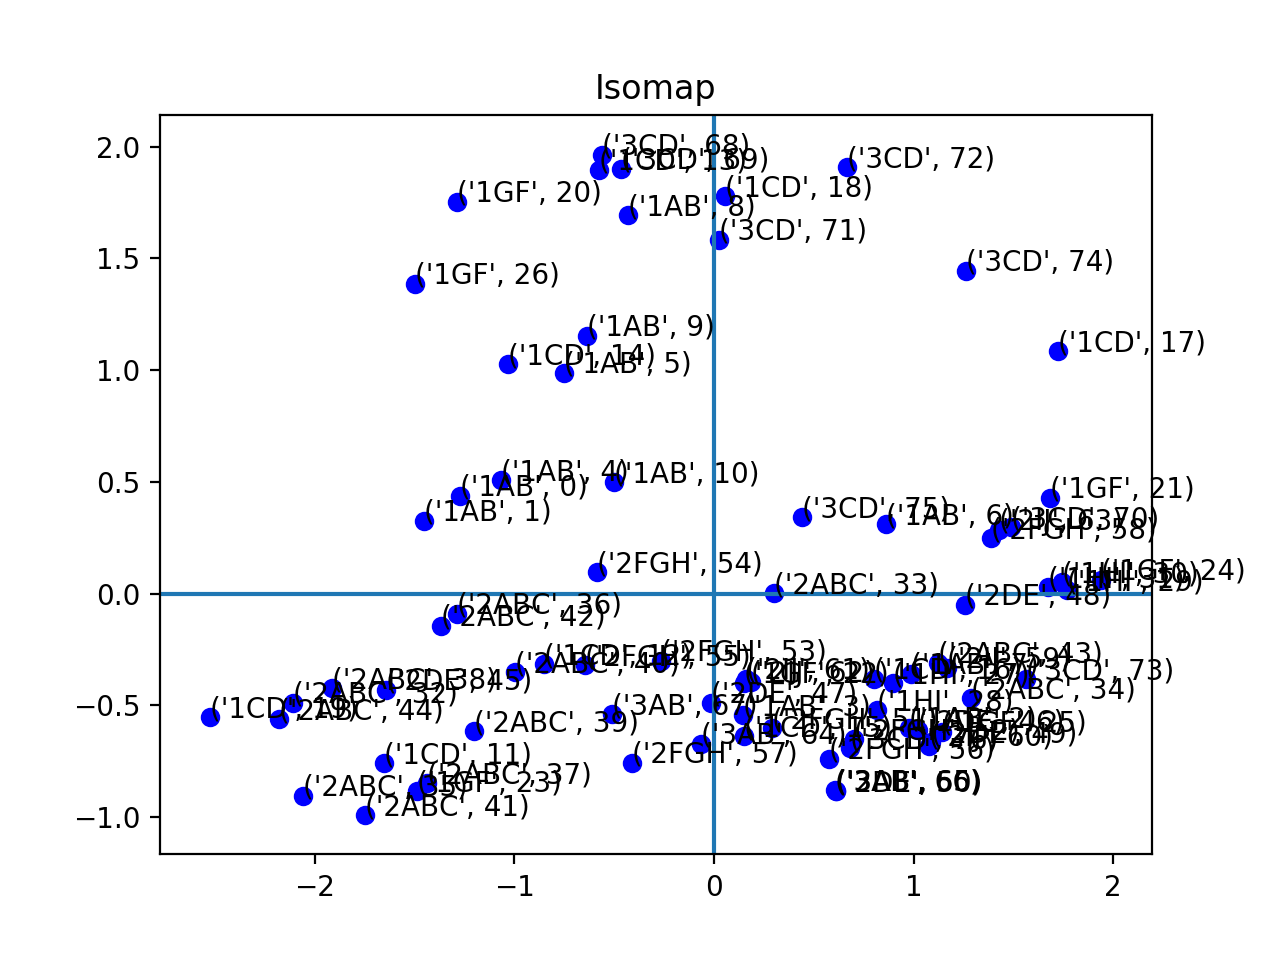

In [35]:
plot_it(data.iloc[:,1],iso_data2d,group="all",title="Isomap")

<IPython.core.display.Javascript object>


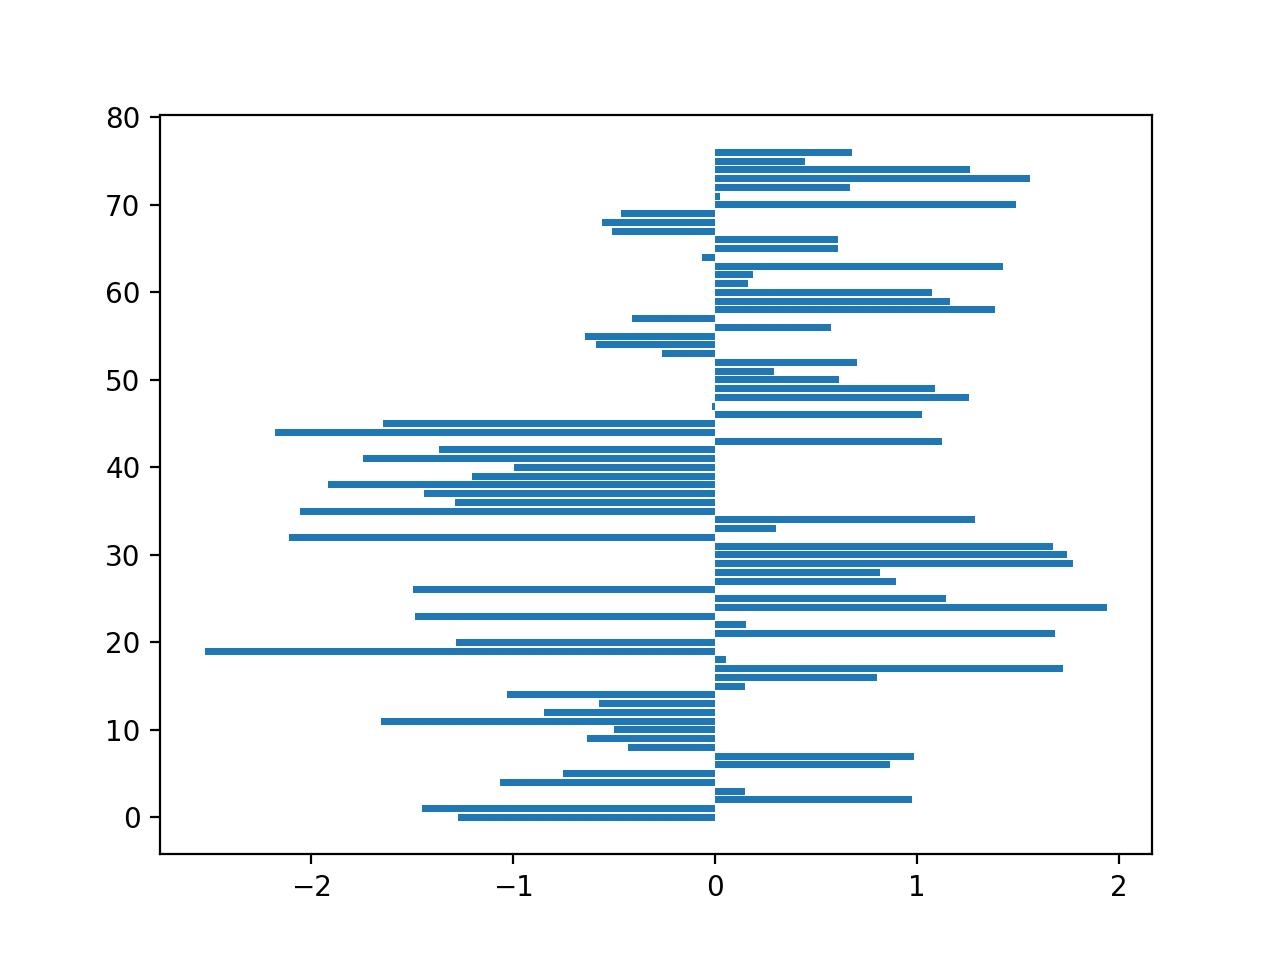

In [29]:
plt.figure()
plt.barh(range(len(data)),iso_data2d[:,0])
plt.show()

In [124]:
## Group wise scaling and then Isomap
ab1 = data.loc[data['group']=='1AB']

<IPython.core.display.Javascript object>


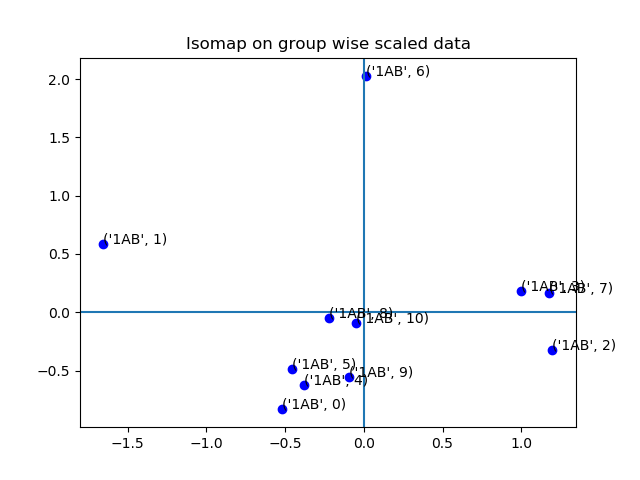

[-0.51763149 -1.6585224   1.19622362  0.99694855 -0.38277131 -0.45636658
  0.01095304  1.17865975 -0.22328269 -0.09495703 -0.04925346]


In [137]:
# separating observation data from grasp log data

# fetching observation data
obvdata = ab1.iloc[:,2:8]


# fetching grasp log data
graspdata = ab1.iloc[:,8:12]

# Applying Standard scaling
s_graspdata = preprocessing.StandardScaler().fit_transform(graspdata)


# Applying MinMax scaling
m_graspdata = preprocessing.MinMaxScaler().fit_transform(graspdata)

# Creating pandas dataframe from output of scaling (numpy scaled array)
scaled_data = pd.DataFrame({'Accessed':m_graspdata[:,0],'Create':m_graspdata[:,1],'Open':m_graspdata[:,2],'Update':m_graspdata[:,3]})

# Concatenating scaled grasp data with observation data
s_data = pd.concat([obvdata,scaled_data],axis=1)

isomap = Isomap(n_components =2)

isodata_ab1 = isomap.fit_transform(s_data)

plot_it(data.iloc[:,1],isodata_ab1,group="1AB",title="Isomap on group wise scaled data")

print(isodata_ab1[:,0])

In [32]:
s_data['isomap1']=iso_data2d[:,0]

In [34]:
a=s_data.corr
print(a)

<bound method DataFrame.corr of     disengaged  looking  talking  intTech  intRes  intExt  Accessed    Create  \
0          0.0    0.000    1.000    1.000   0.000   0.000  0.086957  0.000000   
1          0.0    0.000    1.000    1.000   0.000   0.000  0.260870  0.615385   
2          0.0    0.000    1.000    0.500   1.000   1.000  0.000000  0.000000   
3          0.0    0.500    1.000    0.500   1.000   0.500  0.130435  0.153846   
4          0.0    0.500    1.000    1.000   0.000   0.000  0.000000  0.000000   
5          0.5    0.500    1.000    1.000   0.000   0.000  0.000000  0.000000   
6          0.5    0.500    1.000    1.000   1.000   0.500  0.521739  0.461538   
7          0.0    0.500    1.000    1.000   1.000   1.000  0.000000  0.076923   
8          1.0    0.500    1.000    1.000   0.000   0.500  0.043478  0.153846   
9          0.5    0.500    1.000    1.000   0.000   0.500  0.000000  0.000000   
10         0.5    0.500    1.000    1.000   0.500   0.000  0.000000  0.000000